In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile
from scipy.signal import hilbert
from scipy.signal import convolve2d

In [2]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'

In [3]:
def int_autocorr(x):
    # Function to compute the instantenous autocorrelation
    # John T. Semmlow, Biosignal and biomedical image processing:
    # MATLAB-based applications, Part 1
    # Output
    #    Rx instantaneous autocorrelation
    #  Input
    #    x signal

    N = x.size
    Rx = np.zeros((N, N), dtype='complex')  # % Initialize output
    # %
    # % Compute instantenous autocorrelation
    for ti in range(N - 1):  # 1:N % Increment over time
        taumax = min([ti, N - ti - 1, int(round(N / 2.) - 1)])
        tau = np.arange(-taumax, taumax + 1)
        Rx[tau - tau[0], ti] = x[ti + tau] * np.conj(x[ti - tau])

    return Rx


def cohen(x, fs, type_='WV'):
    """
    Function to compute several of Cohen's class of
    time-frequency distributions
    John T. Semmlow, Biosignal and biomedical image processing:
    MATLAB-based applications, Part 1

    Outputs
         CD Selected distribution
         f Frequency vector for plotting
         t Time vector for plotting
    Inputs
         x  Complex signal
         fs Sampling frequency
         type of distribution. Valid arguments are:
         'choi' (Choi-Williams), 'BJC' (Born-Jorden-Cohen);
         and 'R_M' (Rihaczek-Margenau) Default is Wigner-Ville
    """

    # Assing constants and check input
    # sigma = 1                    # Choi-Williams constant
    L = 30                       # Size of determining function

    N = x.size
    # Calculate time and frequency
    t = np.arange(0, N).astype(float) / fs
    f = np.arange(0, N).astype(float) * (fs / (2 * N))  # vectors for plotting

    # Compute instantenous autocorrelation: Eq. (7)
    CD = int_autocorr(x)

    # if type_[1] == 'c':            # Get appropriate determining
    #                                # function
    #     G = choi(sigma,L)          # Choi-Williams
    # elif type_[1] == 'B':
    #     G = BJC(L);                # Born-Jorden-Cohen
    # elif type_[1] == 'R':
    #     G = R_M(L);                # Rihaczek-Margenau
    # else:
    G = np.zeros((L, L), dtype=int)  # Default Wigner-Ville
    G[L // 2 - 1, L // 2 - 1] = 1

    #  Convolve determining function with instantenous
    #  autocorrelation
    CD = convolve2d(CD, G, "same")             # 2-D convolution

    return np.fft.fft(CD, axis=0), f, t

In [4]:
N = 512
fs = 500
dt = 1/fs
t = np.arange(N)*dt
f1 = 20
f2 = 100

In [5]:
chirp = sig.chirp(t, f1, t[-1], f2)

<Figure size 1080x576 with 0 Axes>

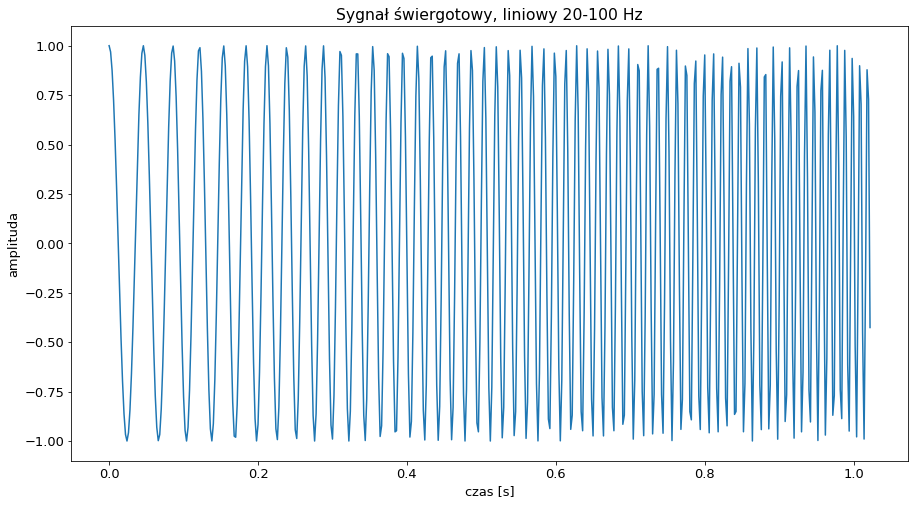

<Figure size 1080x576 with 0 Axes>

In [6]:
plt.plot(t, chirp)
plt.xlabel('czas [s]')
plt.ylabel('amplituda')
plt.title('Sygnał świergotowy, liniowy 20-100 Hz')
plt.figure()

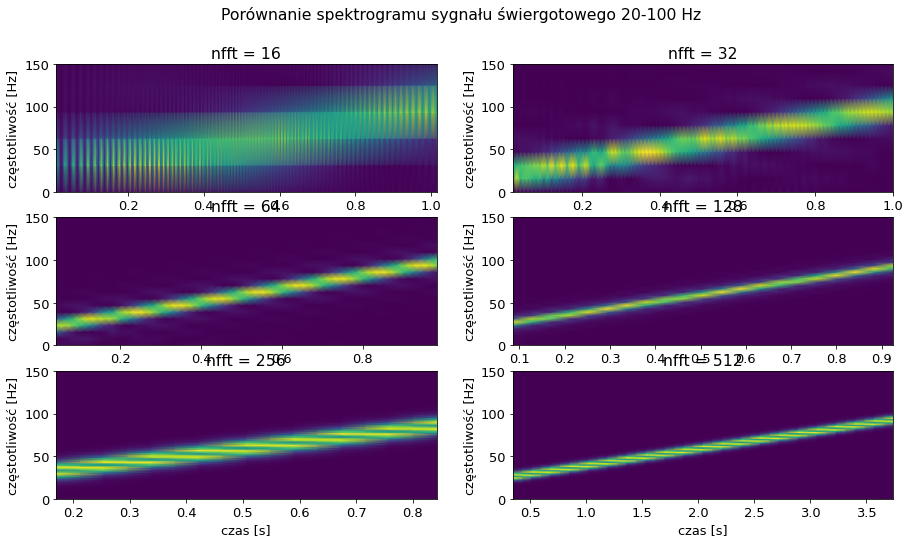

In [7]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.suptitle('Porównanie spektrogramu sygnału świergotowego 20-100 Hz')
nfft = 16
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax1.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax1.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
nfft = 32
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax2.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax2.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
nfft = 64
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax3.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax3.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
nfft = 128
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax4.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax4.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
nfft = 256
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax5.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax5.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
N = 512 * 4
t = np.arange(N)*dt
chirp = sig.chirp(t, f1, t[-1], f2)
nfft = 512
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5))
ax6.pcolormesh(tt, ff, Sxx, shading='gouraud')
ax6.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title=f'nfft = {nfft}', ylim=(0,150))
plt.show()

In [8]:
N = 512
t = np.arange(N)*dt
chirp = sig.chirp(t, f1, t[-1], f2)

hilb_chrip = sig.hilbert(chirp)

In [9]:
x_wv, f_wv, t_wv = cohen(hilb_chrip, fs, type_='WV')

C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\864690953.py:6: RuntimeWarning: divide by zero encountered in log
  pcm2 = ax2.pcolormesh(t_wv, f_wv, np.log(np.abs(x_wv)))


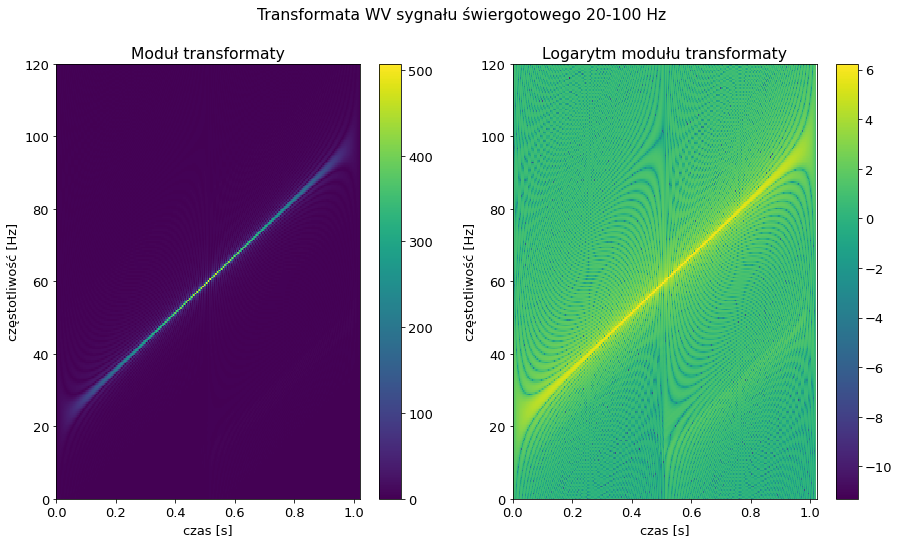

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Transformata WV sygnału świergotowego 20-100 Hz')
pcm1 = ax1.pcolormesh(t_wv, f_wv, np.abs(x_wv))
ax1.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='Moduł transformaty', ylim=(0,120))
fig.colorbar(pcm1, ax=ax1)
pcm2 = ax2.pcolormesh(t_wv, f_wv, np.log(np.abs(x_wv)))
ax2.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='Logarytm modułu transformaty', ylim=(0,120))
fig.colorbar(pcm2, ax=ax2)
plt.show()

C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\1525899895.py:9: RuntimeWarning: divide by zero encountered in log10
  pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')


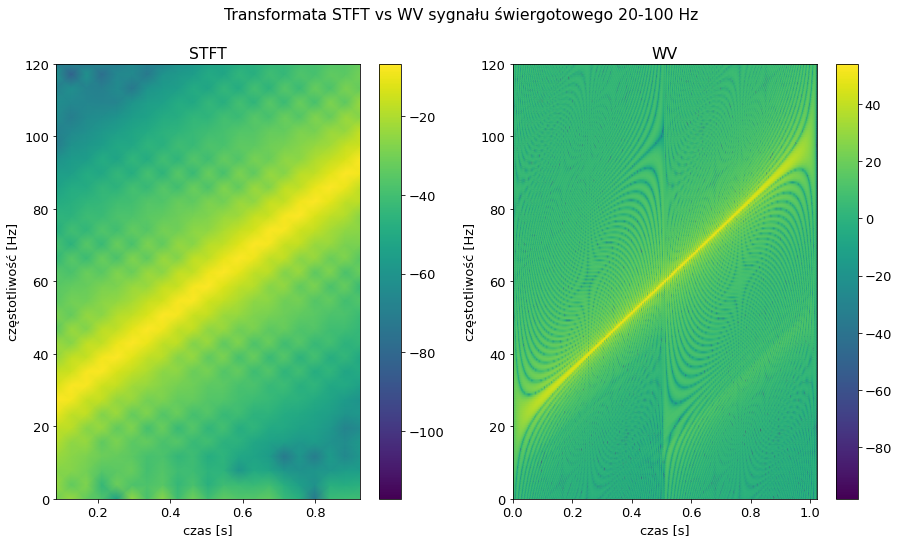

In [11]:
nfft = 128

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Transformata STFT vs WV sygnału świergotowego 20-100 Hz')
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5), scaling='spectrum', mode='magnitude')
pcm1 = ax1.pcolormesh(tt, ff, 20 * np.log10(Sxx), shading='gouraud')
ax1.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='STFT', ylim=(0,120))
fig.colorbar(pcm1, ax=ax1)
pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
ax2.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='WV', ylim=(0,120))
fig.colorbar(pcm2, ax=ax2)
plt.show()

C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\3356756396.py:13: RuntimeWarning: divide by zero encountered in log10
  pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\3356756396.py:27: RuntimeWarning: divide by zero encountered in log10
  pcm4 = ax4.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')


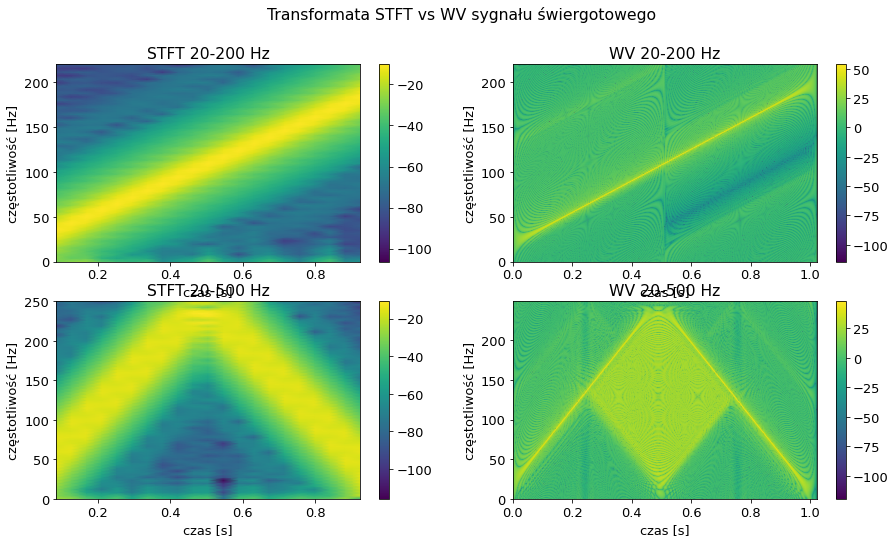

In [12]:
f2 = 200
chirp = sig.chirp(t, f1, t[-1], f2)

hilb_chrip = sig.hilbert(chirp)
x_wv, f_wv, t_wv = cohen(hilb_chrip, fs, type_='WV')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Transformata STFT vs WV sygnału świergotowego')
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5), scaling='spectrum', mode='magnitude')
pcm1 = ax1.pcolormesh(tt, ff, 20 * np.log10(Sxx), shading='gouraud')
ax1.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='STFT 20-200 Hz', ylim=(0,220))
fig.colorbar(pcm1, ax=ax1)
pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
ax2.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='WV 20-200 Hz', ylim=(0,220))
fig.colorbar(pcm2, ax=ax2)

f2 = 500
chirp = sig.chirp(t, f1, t[-1], f2)

hilb_chrip = sig.hilbert(chirp)
x_wv, f_wv, t_wv = cohen(hilb_chrip, fs, type_='WV')

ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5), scaling='spectrum', mode='magnitude')
pcm3 = ax3.pcolormesh(tt, ff, 20 * np.log10(Sxx), shading='gouraud')
ax3.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='STFT 20-500 Hz')
fig.colorbar(pcm3, ax=ax3)
pcm4 = ax4.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
ax4.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='WV 20-500 Hz')
fig.colorbar(pcm4, ax=ax4)

plt.show()

C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\1421796035.py:15: RuntimeWarning: divide by zero encountered in log10
  pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
C:\Users\bogum\AppData\Local\Temp\ipykernel_3920\1421796035.py:30: RuntimeWarning: divide by zero encountered in log10
  pcm4 = ax4.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')


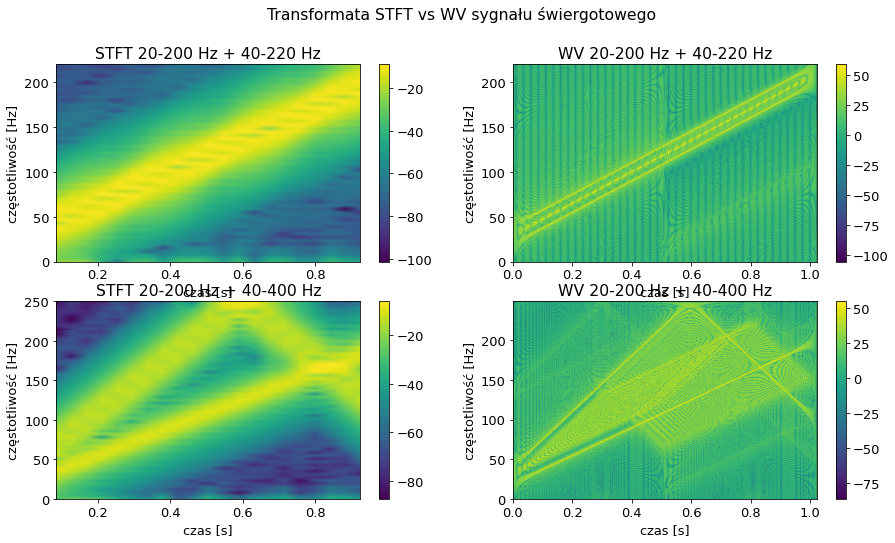

In [16]:
f2 = 200
f2_prim = f2 + f1

chirp = sig.chirp(t, f1, t[-1], f2) + sig.chirp(t, 2 * f1, t[-1], f2_prim)

hilb_chrip = sig.hilbert(chirp)
x_wv, f_wv, t_wv = cohen(hilb_chrip, fs, type_='WV')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Transformata STFT vs WV sygnału świergotowego')
ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5), scaling='spectrum', mode='magnitude')
pcm1 = ax1.pcolormesh(tt, ff, 20 * np.log10(Sxx), shading='gouraud')
ax1.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='STFT 20-200 Hz + 40-220 Hz', ylim=(0,220))
fig.colorbar(pcm1, ax=ax1)
pcm2 = ax2.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
ax2.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='WV 20-200 Hz + 40-220 Hz', ylim=(0,220))
fig.colorbar(pcm2, ax=ax2)

f2_prim = 2 * f2

chirp = sig.chirp(t, f1, t[-1], f2) + sig.chirp(t, 2 * f1, t[-1], f2_prim)

hilb_chrip = sig.hilbert(chirp)
x_wv, f_wv, t_wv = cohen(hilb_chrip, fs, type_='WV')

ff, tt, Sxx = sig.spectrogram(chirp, fs=fs, noverlap=nfft/2, nfft=nfft, nperseg=int(nfft/1.5), scaling='spectrum', mode='magnitude')
pcm3 = ax3.pcolormesh(tt, ff, 20 * np.log10(Sxx), shading='gouraud')
ax3.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='STFT 20-200 Hz + 40-400 Hz')
fig.colorbar(pcm3, ax=ax3)
pcm4 = ax4.pcolormesh(t_wv, f_wv, 20 * np.log10(np.abs(x_wv)), shading='gouraud')
ax4.set(xlabel='czas [s]', ylabel='częstotliwość [Hz]', title='WV 20-200 Hz + 40-400 Hz')
fig.colorbar(pcm4, ax=ax4)

plt.show()